In [1]:
#SetUp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imgpath='img1.jpg'
img=Image.open(imgpath)
img=img.convert("L")
img_array=np.array(img)
width,hight=img.size
N=width*hight
# print(img_array)

Text(0.5, 1.0, 'original image Histogram')

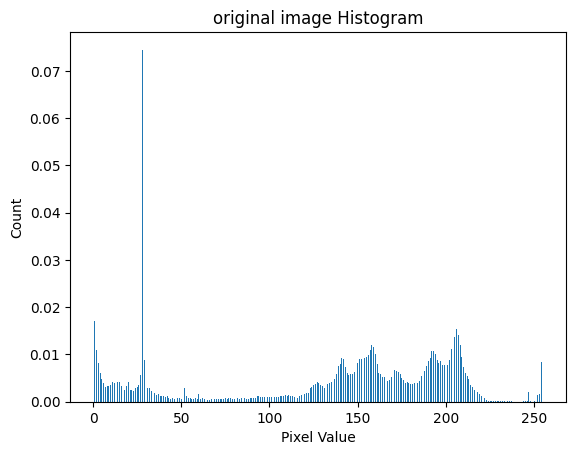

In [2]:
#count color NKN
NKN = {}
for i in range(256):
    NKN[i]=0

for i in range(hight):
    for j in range(width):
        color=img_array[i][j]
        if color not in NKN:
            NKN[color]=1/N
        else:    
            NKN[color]+=1/N

# Create a histogram using matplotlib
pixel_values = list(NKN.keys())
counts = list(NKN.values())
plt.bar(pixel_values, counts, width=0.5, align='center')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.title('original image Histogram')
# plt.show()

# total 1 check
# x=0
# for i in Prk:
#     x+=Prk[i]
#     print(x)


In [3]:
#Create dict that contain rk=0-255 mathing with newColor that addition more contrast (the upper bound =1)
sk = {}
sk[0]=NKN[0]
d=NKN[0]
for i in range(1,256):
    sk[i]=sk[i-1]+NKN[i]
# print(sk)



In [4]:
#Adjust img from 0-1 to 0-255
SkAdj={}
for i in range(0,256):
    SkAdj[i]=int((sk[i]*255)//sk[255])


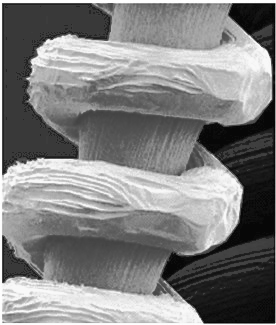

In [5]:
#replace old array with new pixel in SKAdj
for i in range(hight):
    for j in range(width):
        k=img_array[i][j]
        newpixel=SkAdj[k]
        img_array[i][j]=newpixel
imgnew=Image.fromarray(img_array)
imgsavepath='newImgFromHistrogram.jpg'
imgnew.save(imgsavepath)
display(imgnew)

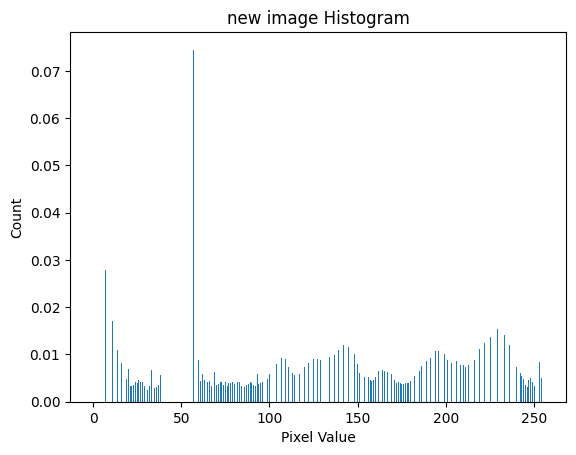

In [6]:
#Create new histrogram dict
finalhistrogram = {}
for i in range(256):
    finalhistrogram[i]=0
#Apped every single pixel in image to the finalhistrogramdict    
for i in range(hight):
    for j in range(width):
        color=img_array[i][j]
        if color not in finalhistrogram:
            finalhistrogram[color]=1/N
        else:    
            finalhistrogram[color]+=1/N
#Plot and Show Histrogram graph
pixel_values2 = list(finalhistrogram.keys())
counts2 = list(finalhistrogram.values())
plt.bar(pixel_values2, counts2, width=0.5, align='center')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.title('new image Histogram')
plt.show()